## Data Cleaning Notebook

In order to get insights from the given data frame, in this first step, some cleaning will be done. Summary: eliminating the null values, identifying outiers, finding correlation, etc.

# 1. Data import

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [2]:
df=pd.read_csv('archive/attacks.csv', encoding='latin1')

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
dim_orig=df.shape
dim_orig

(25723, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
df.columns=[c.lower().replace(' ', '_') for c in df.columns] 
df.columns=[c.lower().replace('.', '_') for c in df.columns] 
df.columns=[c.lower().replace(':', '') for c in df.columns] 
df.columns=[c.lower().replace('/', 'O') for c in df.columns] 
df.columns=[c.lower().replace('(', '') for c in df.columns] 
df.columns=[c.lower().replace(')', '') for c in df.columns] 

df.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# 2. Null Values

In [6]:
nan_cols=df.isnull().sum()
nan_cols[nan_cols>0]     # all of the columns have null values.

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex_                      19986
age                       22252
injury                    19449
fatal_yon                 19960
time                      22775
species_                  22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number_1             19421
case_number_2             19421
original_order            19414
unnamed_22                25722
unnamed_23                25721
dtype: int64

In [7]:
df_orig=df.copy()

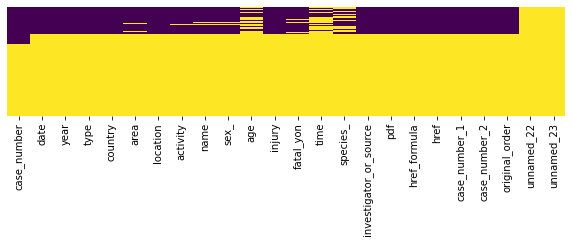

In [8]:
import pylab as plt
import seaborn as sns
plt.figure(figsize=(10,2))

sns.heatmap(df.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

In [9]:
df.fillna({'unnamed_22': 'Columna no contiene información', 'unnamed_23': 'Columna no contiene información'}, inplace=True)

In [10]:
df[df.unnamed_23.str.contains('Teramo')].head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,Columna no contiene información,Teramo


In [11]:
df[df.unnamed_23.str.contains('change filename')].head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,Columna no contiene información,change filename


In [12]:
qty_of_nuls = 20
df.iloc[df[(df.isnull().sum(axis=1)>qty_of_nuls)].index]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información


In [13]:
df = df.drop(df[df.isnull().sum(axis=1) > 20].index)

In [14]:
df.shape

(6309, 24)

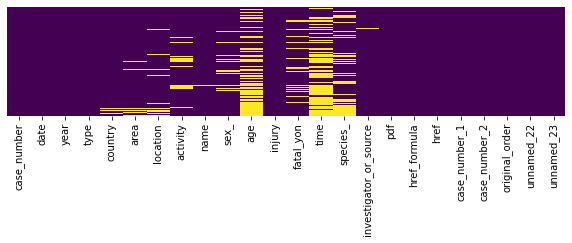

In [15]:
plt.figure(figsize=(10,2))

sns.heatmap(df.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

In [16]:
index_yon=df[df['fatal_yon'].isna()].index
df.drop(index=index_yon,inplace=True)

In [17]:
index_species_=df[df['species_'].isna()].index
df.drop(index=index_species_,inplace=True)

In [18]:
index_sex_=df[df['sex_'].isna()].index
df.drop(index=index_sex_,inplace=True)

In [19]:
index_activity=df[df['activity'].isna()].index
df.drop(index=index_activity,inplace=True)

In [20]:
df.shape

(2628, 24)

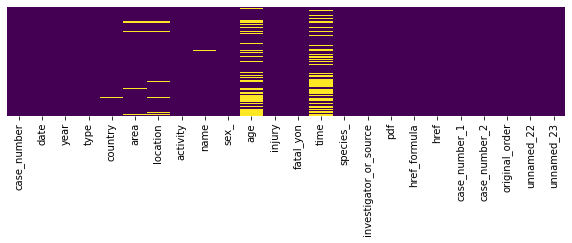

In [21]:
plt.figure(figsize=(10,2))

sns.heatmap(df.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

In [22]:
nan_cols=df.isnull().sum()
nan_cols[nan_cols>0] 

country                     5
area                       90
location                   99
name                       12
age                       698
time                      941
investigator_or_source      5
dtype: int64

In [23]:
df.fillna({'country':'unknown','area':'unknown','location':'unknown','name':'unknown','age':0, 'time':'unknown','investigator_or_source':'unknown',}, inplace=True)

In [24]:
nan_cols=df.isnull().sum()
nan_cols[nan_cols>0] 

Series([], dtype: int64)

In [25]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Columna no contiene información,Columna no contiene información
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Columna no contiene información,Columna no contiene información
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Columna no contiene información,Columna no contiene información
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,Columna no contiene información,Columna no contiene información
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,unknown,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,Columna no contiene información,Columna no contiene información


# 3.Determination of data type per column:

**case_number** --> This would be usefull for each case identification. As we have the index for identifying each case,
let's take this column as irrelevant. That is why it is not going to be cleaned. Column type will be unchanged and it 
will remain as "Object".


**date** --> This must be in date time as data type. Let's going to fix it:

In [26]:
df.country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'COSTA RICA',
       'MALDIVES', 'SOUTH AFRICA', 'THAILAND', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', 'CUBA', 'NEW ZEALAND', 'SPAIN',
       'EGYPT', 'REUNION', 'UNITED KINGDOM', 'PHILIPPINES', 'INDONESIA',
       'COLUMBIA', 'FRENCH POLYNESIA', 'UNITED ARAB EMIRATES', 'FIJI',
       'JAPAN', 'ST. MARTIN', 'FRANCE', 'BELIZE', 'JAMAICA', 'TONGA',
       'SCOTLAND', 'ITALY', 'TAIWAN', 'PAPUA NEW GUINEA', 'RUSSIA',
       'SEYCHELLES', 'TURKS & CAICOS', 'MALTA', 'VIETNAM', 'MOZAMBIQUE',
       'GUAM', 'CROATIA', 'PANAMA', 'SOLOMON ISLANDS', 'NORWAY',
       'Sierra Leone', 'ATLANTIC OCEAN', 'ST. MAARTIN', 'GRAND CAYMAN',
       'CHINA', 'VANUATU', 'SOUTH KOREA', 'MADAGASCAR', ' TONGA',
       'URUGUAY', 'VENEZUELA', 'INDIA', 'MICRONESIA', 'CANADA', 'OKINAWA',
       'TANZANIA', 'MARSHALL ISLANDS', 'MAURITIUS', 'SENEGAL',
       'EGYPT / ISRAEL', 'HONG KONG', 'CHILE', 'CARIBBEAN SEA', 'ANGOLA',
       'Fiji', 'IRAN'

In [27]:
df['country']=df['country'].replace('Sierra Leone','SIERRA LEONE')

In [28]:
df['country']=df['country'].replace('ST. MAARTIN','ST. MARTIN')

In [29]:
df['country']=df['country'].replace('Fiji','FIJI')

In [30]:
df.area.unique()

array(['California', 'New South Wales', 'Colima', 'Pernambuco', 'Florida',
       'Queensland', 'Cornwall', 'Westerm Australia', 'Cocos Island',
       'Western Australia', 'Alifu Alifu Atoll', 'Western Cape Province',
       'Hawaii', 'Hua Hin', 'New Providence', 'Alagoas', 'unknown',
       'Eastern Cape Province', 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'South Australia', 'North Island',
       'Canary Islands', 'Massachusetts', 'South Carolina',
       'Red Sea Protectorate', 'Majorca', 'Washington', 'Tabasco',
       'South Devon', 'New Providence ', 'Luzon Island', 'Great Exuma',
       'Bimini', 'Bali', 'Alicante Province', 'Abaco Islands',
       'Isla Provedencia', 'Texas', 'North Carolina', 'Suez', 'Tuamotos',
       'Grand Terre', 'Santa Catarina State', 'Balneário Camboriú',
       'Fujairah Emirate', 'Grand Canary Island', 'Phuket', 'Tasmania',
       'Grand Bahama Island',

In [31]:
df.location.unique()

array(['Oceanside, San Diego County', 'Arrawarra Headland', 'La Ticla',
       ..., 'Shatt-el Arab River near a small boat stand',
       'East of the Ras Tanura-Jubail area ', '            '],
      dtype=object)

In [32]:
df.name.unique()

array(['Julie Wolfe', 'male', 'Gustavo Ramos ', ...,
       'Occupant:     Mr. Maciotta', 'a servant', 'Arab boy'],
      dtype=object)

In [33]:
df.age.unique()

array(['57', 0, '18', '52', '15', '32', '21', '34', '30', '60', '33',
       '29', '54', '56', '12', '19', '25', '10', '69', '38', '55', '35',
       '46', '45', '14', '40s', '28', '20', '24', '26', '49', '22', '7',
       '31', '40', '13', '37', '50', '48', '17', '58', '65', '73', '36',
       '60s', '51', '43', '61', '59', '42', '6', '23', '39', '41', '11',
       '71', '44', '27', '62', '68', '9', '16', '47', '63', '70',
       '18 months', '53', '20s', '30s', 'Teen', '66', '74', '64',
       '28 & 26', '8', 'teen', '18 or 20', '46 & 34', '77', '84', '\xa0 ',
       ' ', '30 or 36', '6½', '21 & ?', '5', ' 30', ' 28', '20?', "60's",
       '32 & 30', '>50', 'adult', '9 months', '25 to 35', '23 & 26',
       '33 & 37', '30 & 32', '17 & 35', '13 or 18', ' 43', '"young"',
       '7 or 8', 'Both 11', '9 or 10', '13 or 14'], dtype=object)

In [34]:
(df[df['age']=='20s'].index.values)

array([502, 881], dtype=int64)

In [35]:
df.loc[[502, 881],"age"]=20

In [36]:
(df[df['age']=='30s'].index.values)

array([ 509, 1481, 1526, 2634, 2635], dtype=int64)

In [37]:
df.loc[[509, 1481, 1526, 2634, 2635],"age"]=30

In [38]:
(df[df['age']=='28 & 26'].index.values)

array([698], dtype=int64)

In [39]:
df.loc[[698],"age"]=27

In [40]:
(df[df['age']=='18 or 20'].index.values)

array([1325], dtype=int64)

In [41]:
df.loc[[1325],"age"]=19

In [42]:
(df[df['age']=='46 & 34'].index.values)

array([1506], dtype=int64)

In [43]:
df.loc[[1506],"age"]=19

In [44]:
df.drop(df[df.age=='\xa0 '].index, axis=0, inplace=True)

In [45]:
df.drop(df[df.age==' '].index, axis=0, inplace=True)

In [46]:
df.drop(df[df.age=='6½'].index, axis=0, inplace=True)

In [47]:
df.drop(df[df.age=='adult'].index, axis=0, inplace=True)

In [48]:
df.drop(df[df.age=='9 months'].index, axis=0, inplace=True)

In [49]:
df.drop(df[df.age=='"young"'].index, axis=0, inplace=True)

In [50]:
df.drop(df[df.age=='Teen'].index, axis=0, inplace=True)

In [51]:
df.drop(df[df.age=='teen'].index, axis=0, inplace=True)

In [52]:
df.drop(df[df.age=='18 months'].index, axis=0, inplace=True)

In [53]:
df.drop(df[df.age=='17 & 35'].index, axis=0, inplace=True)

In [54]:
df.drop(df[df.age==0].index, axis=0, inplace=True)

In [55]:
(df[df['age']=='20?'].index.values)

array([2441], dtype=int64)

In [56]:
df.loc[[2441],"age"]=20

In [57]:
(df[df['age']=='23 & 26'].index.values)

array([3742], dtype=int64)

In [58]:
df.loc[[3742],"age"]=25

In [59]:
(df[df['age']=='21 & ?'].index.values)

array([1925], dtype=int64)

In [60]:
df.loc[[1925],"age"]=21

In [61]:
(df[df['age']=="60s"].index.values)

array([219], dtype=int64)

In [62]:
df.loc[[2496],"age"]=60

In [63]:
(df[df['age']=='32 & 30'].index.values)

array([2511], dtype=int64)

In [64]:
df.loc[[2511],"age"]=31

In [65]:
(df[df['age']=='>50'].index.values)

array([3364], dtype=int64)

In [66]:
df.loc[[3364],"age"]=50

In [67]:
(df[df['age']=='25 to 35'].index.values)

array([3646], dtype=int64)

In [68]:
df.loc[[3646],"age"]=30

In [69]:
(df[df['age']=='33 & 37'].index.values)

array([3880], dtype=int64)

In [70]:
df.loc[[3880],"age"]=35

In [71]:
(df[df['age']=='30 & 32'].index.values)

array([4009], dtype=int64)

In [72]:
df.loc[[4009],"age"]=31

In [73]:
(df[df['age']=='13 or 18'].index.values)

array([4075], dtype=int64)

In [74]:
df.loc[[4075],"age"]=15

In [75]:
(df[df['age']==' 43'].index.values)

array([4405], dtype=int64)

In [76]:
df.loc[[4405],"age"]=43

In [77]:
(df[df['age']=='7 or 8'].index.values)

array([4489], dtype=int64)

In [78]:
df.loc[[4489],"age"]=7

In [79]:
(df[df['age']=='Both 11'].index.values)

array([4801], dtype=int64)

In [80]:
df.loc[[4801],"age"]=11

In [81]:
(df[df['age']=='9 or 10'].index.values)

array([4818], dtype=int64)

In [82]:
df.loc[[4818],"age"]=9

In [83]:
(df[df['age']=='13 or 14'].index.values)

array([6265], dtype=int64)

In [84]:
df.loc[[6265],"age"]=13

In [85]:
(df[df['age']=='40s'].index.values)

array([ 48, 468], dtype=int64)

In [86]:
df.loc[[48, 468],"age"]=40

In [87]:
(df[df['age']=='60s'].index.values)

array([219], dtype=int64)

In [88]:
df.loc[[219],"age"]=60

In [89]:
(df[df['age']=='30 or 36'].index.values)

array([1881], dtype=int64)

In [90]:
df.loc[[1881],"age"]=33

In [91]:
(df[df['age']==' 28'].index.values)

array([2434], dtype=int64)

In [92]:
df.loc[[2434],"age"]=28

In [93]:
(df[df['age']==' 30'].index.values)

array([2259], dtype=int64)

In [94]:
df.loc[[2259],"age"]=30

In [95]:
df.age.unique()

array(['57', '18', '52', '15', '32', '21', '34', '30', '60', '33', '29',
       '54', '56', '12', '19', '25', '10', '69', '38', '55', '35', '46',
       '45', '14', 40, '28', '20', '24', '26', '49', '22', '7', '31',
       '40', '13', '37', '50', '48', '17', '58', '65', '73', '36', 60,
       '51', '43', '61', '59', '42', '6', '23', '39', '41', '11', '71',
       '44', '27', '62', '68', '9', '16', '47', '63', '70', '53', 20, 30,
       '66', '74', '64', 27, '8', 19, '77', '84', 33, 21, '5', 28, 31, 50,
       25, 35, 15, 43, 7, 11, 9, 13], dtype=object)

In [96]:
df['age'] = df['age'].astype('int')

In [97]:
df.year.unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1922., 1919., 1916., 1912.,
       1906., 1905., 1901., 1899., 1898., 1894., 1892., 1880., 1879.,
       1878., 1868.,    0.])

In [98]:
df['year'] = df['year'].astype('int')

In [99]:
df.year.value_counts()

2015    80
2012    62
2007    58
2002    55
2013    53
        ..
1901     1
1906     1
1912     1
1919     1
1924     1
Name: year, Length: 111, dtype: int64

In [100]:
df.sex_.value_counts()

M      1663
F       253
lli       1
Name: sex_, dtype: int64

In [101]:
df.drop(df[df.sex_=='lli'].index, axis=0, inplace=True)

In [102]:
df.type.value_counts()

Unprovoked      1664
Provoked         202
Boating           28
Invalid           11
Sea Disaster       9
Boat               2
Name: type, dtype: int64

In [103]:
df['type']=df['type'].replace('Boating','Boat')

In [104]:
df.fatal_yon.value_counts()

N       1617
Y        294
 N         3
M          1
2017       1
Name: fatal_yon, dtype: int64

In [105]:
df['fatal_yon']=df['fatal_yon'].replace(' N','N')

In [106]:
df.drop(df[df.fatal_yon=='M'].index, axis=0, inplace=True)

In [107]:
df.drop(df[df.fatal_yon=='2017'].index, axis=0, inplace=True)

In [108]:
df.shape

(1914, 24)

In [109]:
df.species_.value_counts().head(59)

White shark                              94
Tiger shark                              44
Bull shark                               38
4' shark                                 36
6' shark                                 28
1.8 m [6'] shark                         28
1.2 m [4'] shark                         24
4' to 5' shark                           20
3' shark                                 19
1.5 m [5'] shark                         18
5' shark                                 17
3 m [10'] shark                          15
3' to 4' shark                           15
1.2 m to 1.5 m [4' to 5'] shark          14
2 m shark                                12
1.5 m shark                              12
5 m [16.5'] white shark                  11
Raggedtooth shark                        11
Blacktip shark                           11
6 m [20'] white shark                    10
"a small shark"                          10
Wobbegong shark                          10
Zambesi shark                   

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 6276
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             1914 non-null   object 
 1   date                    1914 non-null   object 
 2   year                    1914 non-null   int32  
 3   type                    1914 non-null   object 
 4   country                 1914 non-null   object 
 5   area                    1914 non-null   object 
 6   location                1914 non-null   object 
 7   activity                1914 non-null   object 
 8   name                    1914 non-null   object 
 9   sex_                    1914 non-null   object 
 10  age                     1914 non-null   int32  
 11  injury                  1914 non-null   object 
 12  fatal_yon               1914 non-null   object 
 13  time                    1914 non-null   object 
 14  species_                1914 non-null   

In [112]:
df.date.value_counts()

24-Jun-2015    3
12-Apr-2001    3
20-Sep-2015    3
23-Jan-1970    3
09-Jul-1994    3
              ..
04-Sep-2005    1
05-Sep-2005    1
20-Sep-2005    1
23-Sep-2005    1
Early 1930s    1
Name: date, Length: 1772, dtype: int64

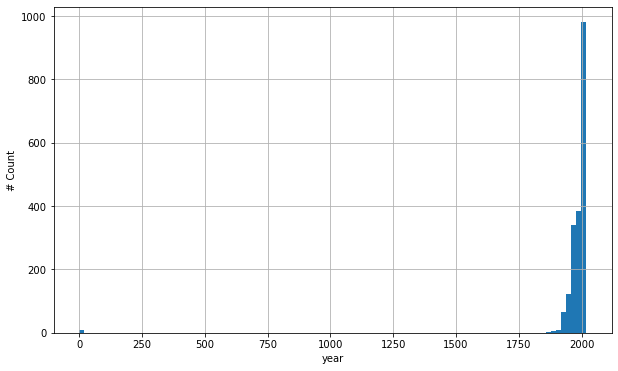

In [113]:
plt.figure(figsize=(10, 6))

df.year.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('year');

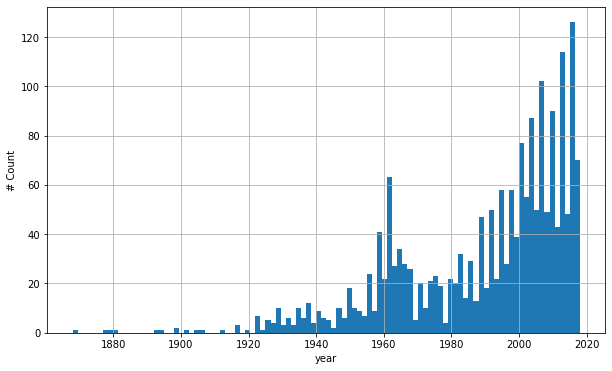

In [114]:
plt.figure(figsize=(10, 6))

data=df[df.year>1550].year

data.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('year');

## Insigt Nº1

Conclusión: sesgo temporal. No han incrementado los ataques de tiburones a lo largo de los años. Simplemente hay más datos.

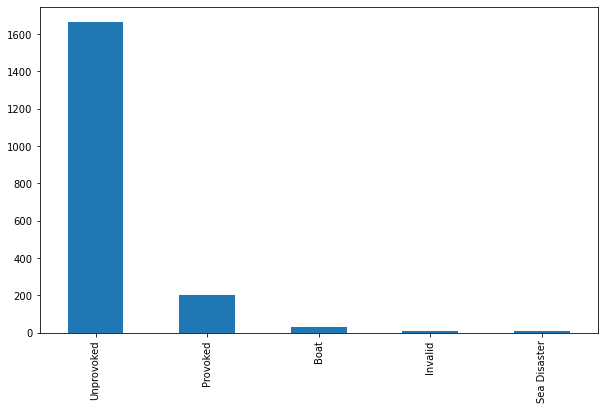

In [115]:
plt.figure(figsize=(10, 6))

df.type.value_counts().plot.bar();

## Insight Nº2

Conclusión: La gran mayoría de los ataques son no provocados. El tiburón ataca por propia supervivencia. No porque alguien le ataque.

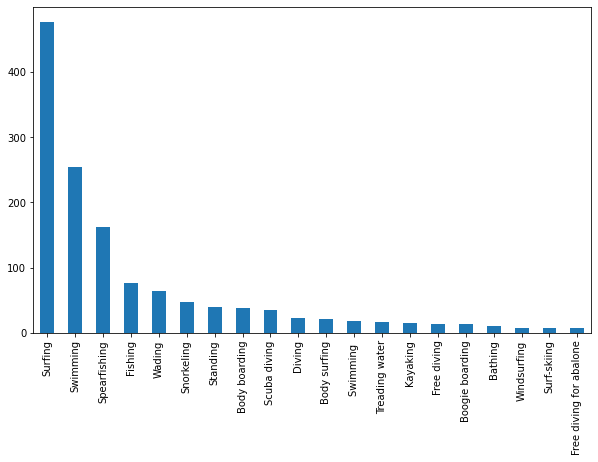

In [116]:
plt.figure(figsize=(10, 6))

df.activity.value_counts().head(20).plot.bar();

## Insight Nº3

Conclusión: Los ataques se producen mientras la víctima realiza una actividad en el medio natural de los tiburones: el mar.

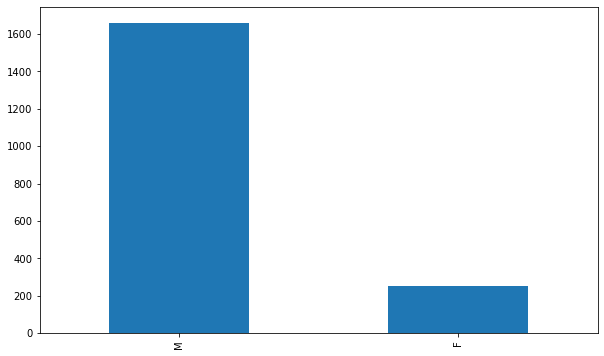

In [117]:
plt.figure(figsize=(10, 6))

df.sex_.value_counts().plot.bar();

## Insight Nº4

Conclusión: La gran mayoría de las victimas son de sexo masculino. Esto no significa que la comida preferida de los tiburones sean hombres. Sino porque los deportes marinos son practicados principalmente por hombres: